### ```>>Customers Churn Prediction```  :-  Customer churn prediction is a proactive approach that uses data and machine learning to forecast which customers are likely to stop using a product or service soon. By identifying these customers early on, businesses can take targeted actions to retain them, thereby reducing overall churn rates and improving customer satisfaction and profitability.

### `>>Objective`  :-  "To predict which customers are likely to churn in the near future based on historical data and customer interactions, and To implement targeted actions and strategies to retain high-risk customers and reduce overall churn rates."

### `>>Constraint`  :-  "Availability of historical customer data, including interactions, transactions, and behaviors, Ensuring the data used for training the model is accurate, relevant, and up-to-date, The model should provide explanations or reasons for its predictions to make the results interpretable and actionable for the business, Budget and resource limitations for implementing and maintaining the churn prediction system.

### `>>ML Success Criteria`  :-  "Achieve a high level of accuracy in predicting customer churn. High precision in identifying at-risk customers, i.e., minimizing false positives. High recall to ensure that as many actual churn cases as possible are detected."

### `>>Business Success Criteria`  :-  "Achieve a significant reduction in the overall churn rate of customers. Increase the retention rate of at-risk customers through targeted retention strategies. Maintain or improve overall customer satisfaction scores by addressing the needs and concerns of at-risk customers proactively."

### `>>Economy Success Criteria`  :-  "Increase in revenue due to reduced customer churn and increased retention of valuable customers. Improve the profitability of the business by reducing costs associated with acquiring new customers to replace those lost to churn. Maintain or increase the company's market share by retaining existing customers and attracting new ones through improved customer satisfaction and loyalty."

### `>>Yes -- 1 , No --0`


**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import os
from sklearn import metrics
from sklearn.metrics import accuracy_score , f1_score , recall_score , confusion_matrix , ConfusionMatrixDisplay, precision_score
from sklearn.feature_selection import VarianceThreshold , chi2 , SelectKBest


**Importing Data Set**

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Descriptions**

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Statistical Description**

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**EXPLORATORY DATA ANALYSIS**

In [8]:
for i in df.columns:
    print(i , df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

**Duplicates records Identification**

In [9]:
df.duplicated().sum()

0

**Missing Values Identification**

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows where 'TotalCharges' is NaN
df = df.dropna(subset=['TotalCharges'])

<Axes: ylabel='Density'>

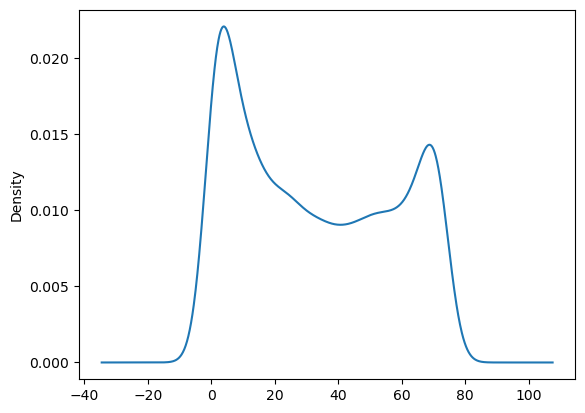

In [12]:
df['tenure'].plot(kind='kde')

<Axes: ylabel='Density'>

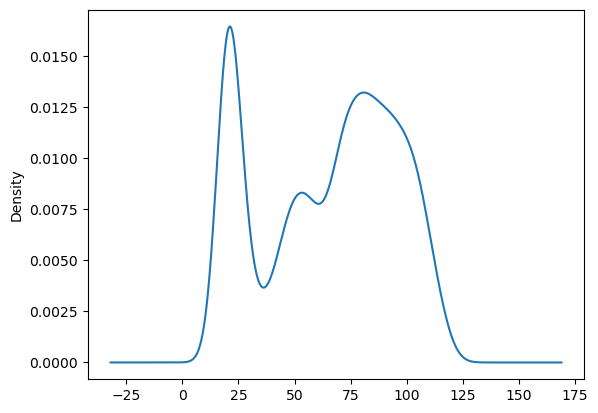

In [13]:
df['MonthlyCharges'].plot(kind='kde')

<Axes: ylabel='Density'>

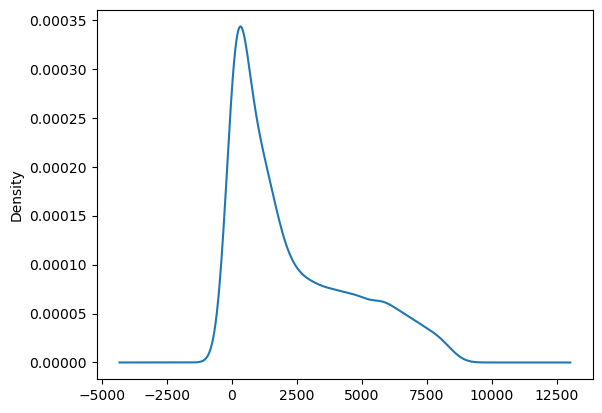

In [14]:
df['TotalCharges'].plot(kind='kde')

<Axes: >

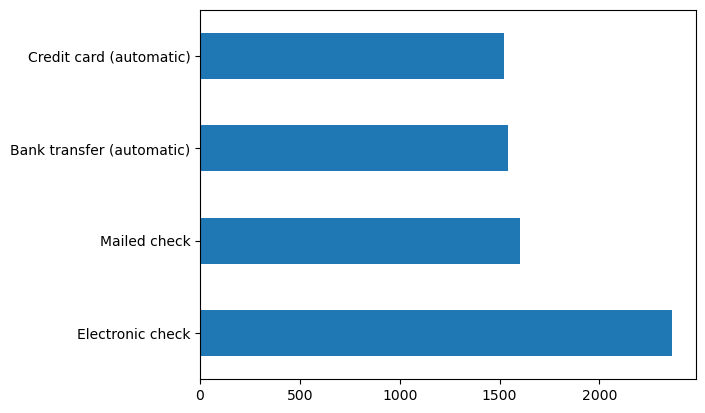

In [15]:
df['PaymentMethod'].value_counts().plot(kind='barh')

<Axes: >

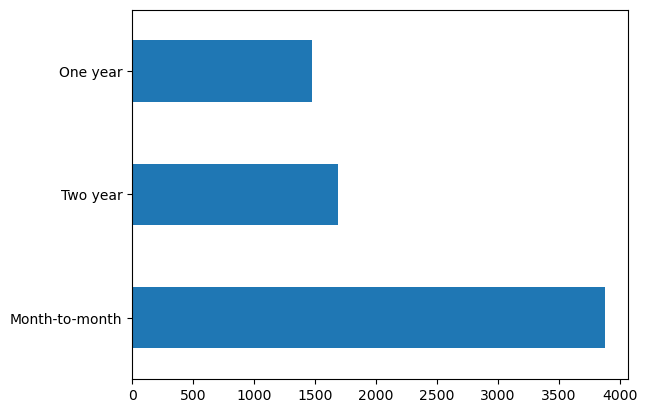

In [16]:
df['Contract'].value_counts().plot(kind='barh')

<Axes: >

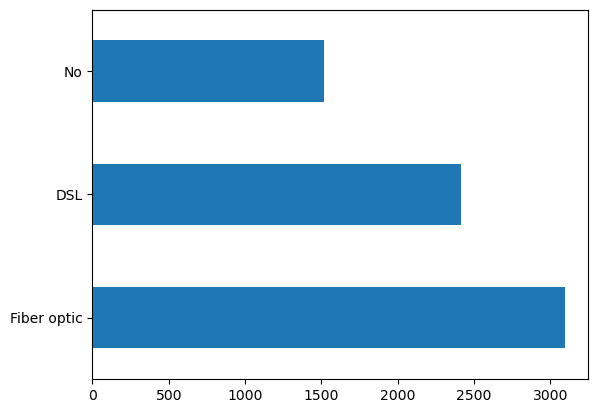

In [17]:
df['InternetService'].value_counts().plot(kind='barh')

<Axes: >

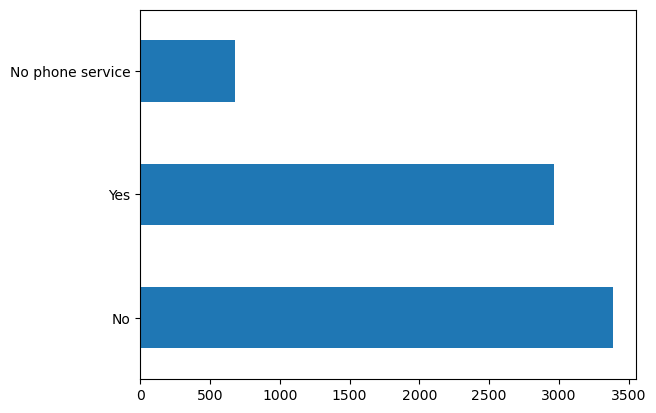

In [18]:
df['MultipleLines'].value_counts().plot(kind='barh')

**Structural Error Handling**

In [19]:
def name(n):
    if n == 'Yes':
        return 1
    else:
        return 0

In [20]:
def gen(n):
    if n == 'Male':
        return 1
    else:
        return 0

In [21]:
df['Partner'] = df['Partner'].apply(name)
df['Dependents'] = df['Dependents'].apply(name)
df['PhoneService'] = df['PhoneService'].apply(name)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(name)
df['Churn'] = df['Churn'].apply(name)
df['gender'] = df['gender'].apply(gen)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_20124\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_20124\4285637898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

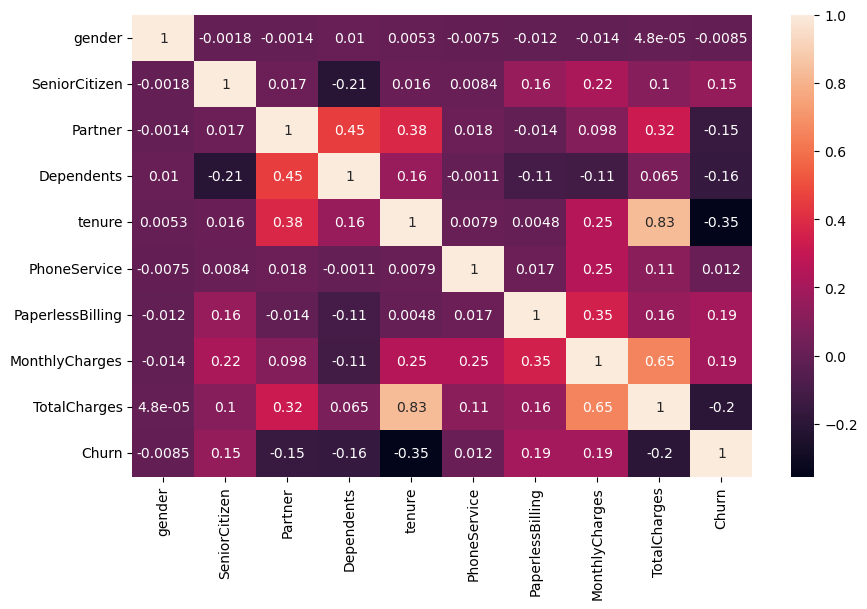

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr() , annot=True)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

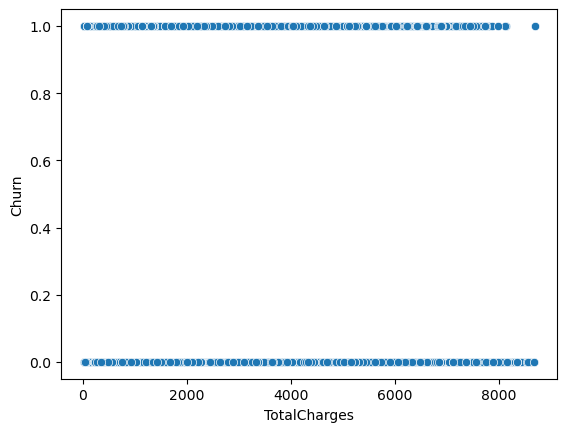

In [25]:
sns.scatterplot(data = df , x = 'TotalCharges' , y = 'Churn')

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

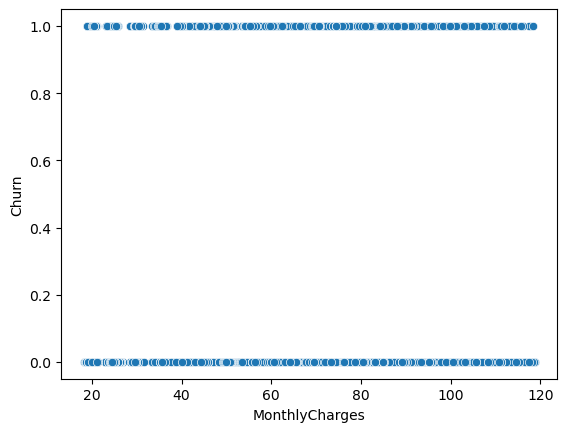

In [26]:
sns.scatterplot(data = df , x = 'MonthlyCharges' , y = 'Churn')

<Axes: xlabel='TotalCharges', ylabel='tenure'>

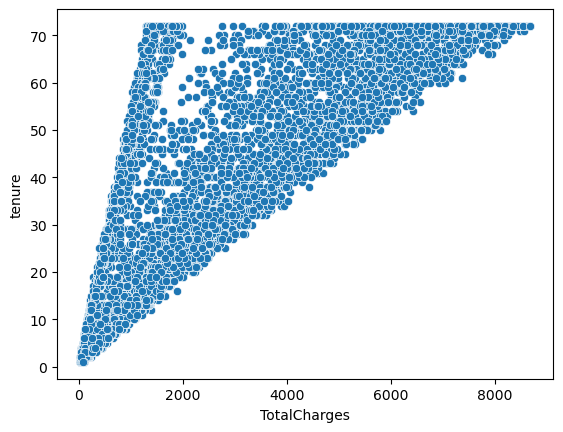

In [27]:
sns.scatterplot(data = df , x = 'TotalCharges' , y = 'tenure')

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

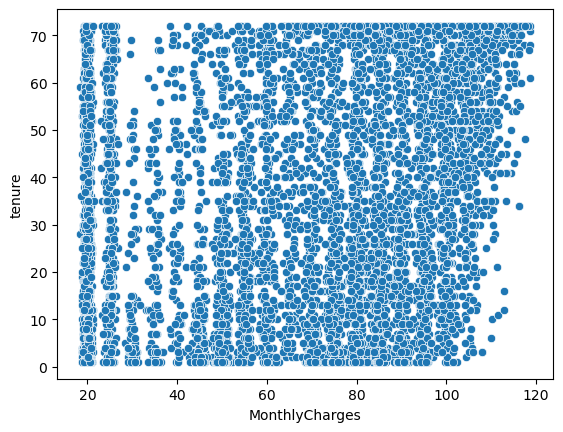

In [28]:
sns.scatterplot(data = df , x = 'MonthlyCharges' , y = 'tenure')

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

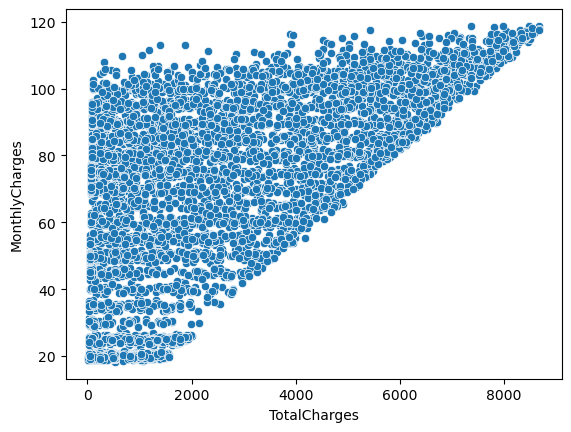

In [29]:
sns.scatterplot(data = df , x = 'TotalCharges' , y = 'MonthlyCharges')

**Feature Selection**

In [30]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [31]:
df.drop('customerID' , axis=1 , inplace=True)

In [32]:
df_num = df.select_dtypes(exclude='object')

In [33]:
df_num

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,74.40,306.60,1


In [34]:
df_num.var()

gender              2.500135e-01
SeniorCitizen       1.360459e-01
Partner             2.497296e-01
Dependents          2.094246e-01
tenure              6.024698e+02
PhoneService        8.736218e-02
PaperlessBilling    2.414375e-01
MonthlyCharges      9.051658e+02
TotalCharges        5.138252e+06
Churn               1.951711e-01
dtype: float64

In [35]:
var = VarianceThreshold(threshold=0.5)
var.fit(df_num)
df_sele = pd.DataFrame(var.transform(df_num) , columns=var.get_feature_names_out())
df_sele

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7027,24.0,84.80,1990.50
7028,72.0,103.20,7362.90
7029,11.0,29.60,346.45
7030,4.0,74.40,306.60


In [36]:
df_cat = df.select_dtypes(include='object').columns

In [37]:
ord = OrdinalEncoder()
df_enc = pd.DataFrame(ord.fit_transform(df[df_cat]) , columns=ord.get_feature_names_out())
df_enc

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0
2,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
7027,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,3.0
7028,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0
7029,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7030,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [38]:
X = df_enc
y = df['Churn']

In [39]:
best = SelectKBest(chi2 , k = 3)
df_best = pd.DataFrame(best.fit_transform(X , y) , columns=best.get_feature_names_out())
df_best

,OnlineSecurity,TechSupport,Contract
0,0.0,0.0,0.0
1,2.0,0.0,1.0
2,2.0,0.0,0.0
3,2.0,2.0,1.0
4,0.0,0.0,0.0
...,...,...,...
7027,2.0,2.0,1.0
7028,0.0,0.0,1.0
7029,2.0,0.0,0.0
7030,0.0,0.0,0.0


In [40]:
df_target = df['Churn']
df_target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [41]:
df_main = pd.concat([df_best , df_sele] , axis=1)

In [42]:
df_main

,OnlineSecurity,TechSupport,Contract,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,1.0,29.85,29.85
1,2.0,0.0,1.0,34.0,56.95,1889.50
2,2.0,0.0,0.0,2.0,53.85,108.15
3,2.0,2.0,1.0,45.0,42.30,1840.75
4,0.0,0.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...
7027,2.0,2.0,1.0,24.0,84.80,1990.50
7028,0.0,0.0,1.0,72.0,103.20,7362.90
7029,2.0,0.0,0.0,11.0,29.60,346.45
7030,0.0,0.0,0.0,4.0,74.40,306.60


In [71]:
df_main['OnlineSecurity'].unique()

array([0., 2., 1.])

**Model Building with pipelines and evaluation of different ML Model to get high performance**

In [53]:
# Define pipeline steps
pipe_1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]
)

N_NEIGHBORS = [i for i in range(3, 21, 2)]
P = [1, 2, 3]

# Observe the Key Value Pair format
parameter_grid_1 = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'classifier__n_neighbors' : N_NEIGHBORS,              
        'classifier__p' : P
    }
]

clf = GridSearchCV(
    estimator=pipe_1, 
    param_grid=parameter_grid_1, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 2min 49s
Wall time: 2min 49s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                          'classifier__p': [1, 2, 3],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             return_train_score=True, scoring='accuracy', verbose=1)

**Finding more accurate performance model and Pipelines to Automate the Workflow**

In [67]:
pipelines = {
    'knn' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'logistic_regression': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'decision_tree': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 2min 30s
Wall time: 2min 30s
Score on Test Data:  0.7796730632551528
********** logistic_regression **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 6.11 s
Wall time: 6.16 s
Score on Test Data:  0.7974413646055437
********** decision_tree **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1.84 s
Wall time: 1.85 s
Score on Test Data:  0.7825159914712153
********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 281 ms
Wall time: 285 ms
Score on Test Data:  0.7533759772565742


**ML Pipelines for Work optimization**

In [68]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

knn
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=17, p=3))])

logistic_regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga'))])

decision_tree
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

naive_bayes
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])



**Evaluationg Best Model Performance**

In [70]:
import joblib
import os

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    # new_data = np.array([[5.1, 3.0, 1.1, 0.1]])
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

********** knn **********
CPU times: total: 297 ms
Wall time: 278 ms
Accuracy Score 0.7796730632551528
Model Size: 665053 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 4 ms
Accuracy Score 0.7974413646055437
Model Size: 1902 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 3 ms
Accuracy Score 0.7825159914712153
Model Size: 7264 Bytes
********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 3 ms
Accuracy Score 0.7533759772565742
Model Size: 1934 Bytes


* **LOGISTIC REGRESSION ALGORITHM GIVING MORE ACCURACY AS COMPARE TO OTHER ALGORITHM.**
* **HENCE I WILL CHOOSE LOGISTIC REGRESSION ALGORITHM FOR FINAL PREDICTION.**